In [1]:
import matplotlib.pyplot as plt
import random
import math
import copy

In [2]:
tamanhoPop = 5000
alturaMax = 5
maxGen = 5
percMutacao = 25
percRecombinacao = 100
percReducaoPop = 50

In [3]:
class No:
    valor = None
    pai = None
    dir = None
    esq = None

    def __init__(self, valor, pai = None):
        self.valor = valor
        self.pai = pai

In [4]:
class Individuo:
    raiz = None
    def __init__(self, raiz:No):
        self.raiz = raiz
        self.ordCalc = []
        self.resultado = 9999
        self.pontos = []

    def altura(self, raiz = None):
        if (raiz == None):
            raiz = self.raiz

        if (raiz == None):
            return -1
        else:
            alturaDireita = -1
            alturaEsquerda = -1
            if (raiz.dir):
                alturaDireita = self.altura(raiz.dir)
            if (raiz.esq):
                alturaEsquerda = self.altura(raiz.esq)
            if (alturaEsquerda < alturaDireita):
                return alturaDireita + 1
            else:
                return alturaEsquerda + 1

    def posOrdem(self, no:No):
        if (not no):
            return
        self.posOrdem(no.esq)
        self.ordCalc.append(no.valor)
        self.posOrdem(no.dir)

    def calcFuncao(self, valor_x):
        self.ordCalc = []
        self.posOrdem(self.raiz)
        formula = ''
        for i in self.ordCalc:
            if (i == 'x'):
                i = valor_x
            formula = formula + ' ' + str(i)
        try:
            return eval(formula)
        except ZeroDivisionError:
            return 9999
        except:
            pass

    def fitness(self, alturaMax):
        self.pontos = []
        if self.altura() > alturaMax:
            self.resultado = 99999
        else:
            y = [0.67, 2.00, 4.00, 6.67, 10.00, 14.00, 18.67, 24.00, 30.00, 36.67]
            somatorio = 0
            for i in range(0, 10):
                resultado_x = self.calcFuncao(i+1)
                self.pontos.append(resultado_x)
                distanciaPontos = math.sqrt( math.pow((y[i] - resultado_x),2) )
                somatorio+=distanciaPontos
            self.resultado = somatorio

    def formula(self):
        self.ordCalc = []
        self.posOrdem(self.raiz)
        formula = ''
        for i in self.ordCalc:
            formula = formula + ' ' + str(i)
        return formula

In [5]:
class AlgoritmoGenetico:

    def __init__(self):
        self.op = ['+', '-', '*', '%']
        self.range = ['x', -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
        self.valoresPossiveis = self.op + self.range
        self.melhorIndividuo = None
        self.tamanhoPop = tamanhoPop
        self.alturaMax = alturaMax
        self.maxGen = maxGen
        self.percMutacao = percMutacao
        self.percRecombinacao = percRecombinacao
        self.percReducaoPop = percReducaoPop


    def geraSubArvore(self, raiz):
        v1 = random.choice(self.valoresPossiveis)
        noEsquerdo = No(v1, raiz)
        raiz.esq = noEsquerdo

        if self.op.count(noEsquerdo.valor):
            self.geraSubArvore(raiz.esq)
        v2 = random.choice(self.valoresPossiveis)
        noDireito = No(v2, raiz)
        raiz.dir = noDireito

        if self.op.count(noDireito.valor):
            self.geraSubArvore(raiz.dir)
        return raiz

    def geraIndiv(self):
        operador = random.choice(self.op)
        raiz = No(operador)
        individuo = Individuo(raiz)
        self.geraSubArvore(individuo.raiz)
        individuo.altura()
        individuo.fitness(self.alturaMax)
        return individuo

    def geraPopIni(self):
        individuals = []
        individuo = self.geraIndiv()
        if individuo.altura() <= self.alturaMax:
            individuals.append(individuo)

        while len(individuals) < self.tamanhoPop:
            individuo = self.geraIndiv()
            if individuo.altura() <= self.alturaMax:
                individuals.append(individuo)
        return individuals

    def ordenaPop(self, populacao:list):
        for item in range(len(populacao) - 1, 0, -1):
            for i in range(item):
                if populacao[i].resultado > populacao[i + 1].resultado:
                    temp = populacao[i]
                    populacao[i] = populacao[i + 1]
                    populacao[i + 1] = temp
        return populacao

    def selecao(self, populacao:list):
        populacao = self.ordenaPop(populacao)
        tamPop = len(populacao)
        corte = int(tamPop - (tamPop * self.percReducaoPop) / 100)
        return populacao[:corte]

    def tree2list(self, raiz:No, lista:list):
        lista.append(raiz)
        if raiz.dir:
            lista = self.tree2list(raiz.dir, lista)
        if raiz.esq:
            lista = self.tree2list(raiz.esq, lista)
        return lista

    def permutacao(self, individual1:Individuo, individual2:Individuo):

        novoIndiv = copy.deepcopy(individual1)
        novoIndiv2 = copy.deepcopy(individual2)
        listaNos = self.tree2list(novoIndiv.raiz, [])
        pontoTroca1 = random.randint(1, len(listaNos)-1)
        listaNos2 = self.tree2list(novoIndiv2.raiz, [])
        pontoTroca2 = random.randint(1, len(listaNos2)-1)
        noTroca1 = listaNos[pontoTroca1] # type:No
        noTroca2 = listaNos2[pontoTroca2] # type:No
        pai_aux = noTroca1.pai
        noTroca1.pai = noTroca2.pai
        noTroca2.pai = pai_aux

        if noTroca1.pai.esq == noTroca2:
            noTroca1.pai.esq = noTroca1
        else:
            noTroca1.pai.dir = noTroca1

        if noTroca2.pai.esq == noTroca1:
            noTroca2.pai.esq = noTroca2
        else:
            noTroca2.pai.dir = noTroca2

        novoIndiv.altura()
        novoIndiv.fitness(self.alturaMax)
        novoIndiv2.altura()
        novoIndiv2.fitness(self.alturaMax)
        return [novoIndiv, novoIndiv2]

    def recombinacao(self, populacao:list, percRecombinacao:int):
        tamPop = len(populacao)
        numRecomb = int((tamPop*percRecombinacao)/100)
        posicRandom = list(range(tamPop))
        random.shuffle(posicRandom)
        novosIndiv = []
        for i in range(int(numRecomb / 2)):
            individual1 = populacao[posicRandom[i]]
            individual2 = populacao[posicRandom[(numRecomb - 1) - i]]
            novosIndiv = novosIndiv + self.permutacao(individual1, individual2)
        return novosIndiv

    def mutacao(self, populacao):
        tamPop = len(populacao)
        qtdMutacao = int(tamPop - (tamPop*self.percMutacao)/100)
        for i in range(0, qtdMutacao):
            index = random.randint(0, (tamPop-1))
            novoIndiv = populacao[index]
            listaNos = self.tree2list(novoIndiv.raiz, [])
            pontoTroca1 = random.randint(1, len(listaNos) - 1)
            noTroca1 = listaNos[pontoTroca1]  # type:No
            operador = random.choice(self.op)
            raiz = No(operador)
            novoIndividuoGerado = Individuo(raiz)
            self.geraSubArvore(novoIndividuoGerado.raiz)
            pai_aux = noTroca1.pai
            novoIndividuoGerado.raiz.pai = pai_aux
            if noTroca1.pai.esq == pai_aux:
                noTroca1.pai.esq = novoIndividuoGerado.raiz
            else:
                noTroca1.pai.dir = novoIndividuoGerado.raiz
            novoIndiv.altura()
            novoIndiv.fitness(self.alturaMax)
        return populacao

    def mostraGrafico(self,melhores):
        x = [1,2,3,4,5,6,7,8,9,10]
        y = [0.67, 2.00, 4.00, 6.67, 10.00, 14.00, 18.67, 24.00, 30.00, 36.67]
        cores = ['blue','red','green','magenta','cyan']

        plt.title(f'Original vs Gerações 1-{maxGen}| Mutação {percMutacao}%| Altura Máx: {alturaMax}')
        plt.xlabel('Ponto')
        plt.ylabel('Valores')
        plt.plot(x,y, ':b',label='Original')
        for idx,individuo in enumerate(melhores):
            y = individuo.pontos
            plt.plot(x,y, color=f'{cores[idx]}',label=f'Geração {idx+1}')
        plt.legend()


    def start(self, popInicial:list):
        gen = 1
        populacao = popInicial
        self.melhorIndividuo = populacao[0]
        melhores = []

        while (gen <= self.maxGen and self.melhorIndividuo.resultado != 0):
            populacao = self.selecao(populacao)
            for i in populacao:
                if (i.resultado < self.melhorIndividuo.resultado):
                    self.melhorIndividuo = copy.deepcopy(i)
            melhores.append(self.melhorIndividuo)

            populacao = self.mutacao(populacao)
            novosIndiv = self.recombinacao(populacao, self.percRecombinacao)
            populacao = populacao + novosIndiv
            gen = gen + 1
        print ('\n--- Fim ---')
        for geracao,individuo in enumerate(melhores):
            print (f'Gen: {geracao+1} | Melhor: {individuo.resultado} ({individuo.formula()})')
            print(f'Pontos: {individuo.pontos}')
        self.mostraGrafico(melhores)


--- Fim ---
Gen: 1 | Melhor: 24.0 ( -5 - 0 % 1 + 4 * x + -1)
Pontos: [-2, 2, 6, 10, 14, 18, 22, 26, 30, 34]
Gen: 2 | Melhor: 20.0 ( 1 * 4 * x + -4 * 2)
Pontos: [-4, 0, 4, 8, 12, 16, 20, 24, 28, 32]
Gen: 3 | Melhor: 20.0 ( 1 * 4 * x + -4 * 2)
Pontos: [-4, 0, 4, 8, 12, 16, 20, 24, 28, 32]
Gen: 4 | Melhor: 20.0 ( 1 * 4 * x + -4 * 2)
Pontos: [-4, 0, 4, 8, 12, 16, 20, 24, 28, 32]
Gen: 5 | Melhor: 20.0 ( 1 * 4 * x + -4 * 2)
Pontos: [-4, 0, 4, 8, 12, 16, 20, 24, 28, 32]


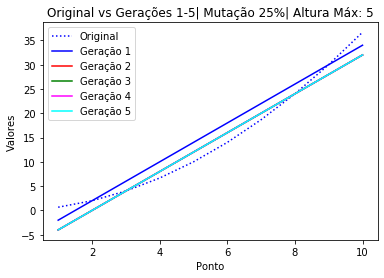

In [6]:
algoritmo = AlgoritmoGenetico()
popInicial = algoritmo.geraPopIni()
algoritmo.start(popInicial)